In [95]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [96]:
df = pd.read_csv('../data/results_dataframe_{}.csv'.format('2022-05-18'))#, index_col=[0,1])
df['period']=pd.to_datetime(df.period)
df.sort_values(['company', 'period'], inplace=True)

companies = df.company.unique()
topics = df.columns[3:]

In [97]:
# Lets drop the huge values
for col in df.columns[3:]:
    df = df[df[col] < df[col].mean()*4]
df.describe(); df.columns[3:]

Index(['DBS', 'Scope of Digital Business Strategy',
       'Scale of Digital Business Strategy',
       'Speed of Digital Business Strategy',
       'Sources of Value Creation and Capture'],
      dtype='object')

In [98]:
# Lets change up the column names...
for col in df.columns[4:]:
    df.rename(columns={col: col.split()[0]}, inplace=True)

In [99]:
# lets extracvrt the X for ML

X = df.values[:,3:];X, np.shape(X)

(array([[91, 37, 166, 96, 132],
        [82, 39, 164, 86, 128],
        [81, 25, 115, 75, 102],
        ...,
        [330, 151, 526, 370, 460],
        [333, 154, 499, 369, 435],
        [328, 137, 508, 327, 439]], dtype=object),
 (1491, 5))

In [100]:
# lets add some kmeans labels ;) 

for n_clusters in range(2,5):

    kmeans = KMeans(n_clusters=n_clusters,
                    init='k-means++', 
                    random_state=0,
                    max_iter=300,
                    algorithm='auto',
                    n_init=20,
                   ).fit(X)
    df["kmeansLabels_n{}".format(n_clusters)] = kmeans.labels_
    

In [101]:
df.head(3)

,period,company,level_1,DBS,Scope,Scale,Speed,Sources,kmeansLabels_n2,kmeansLabels_n3,kmeansLabels_n4
0,2017-03-01,ADP,ADP_2017_Q1,91,37,166,96,132,0,1,3
52,2017-06-01,ADP,ADP_2017_Q2,82,39,164,86,128,0,1,3
106,2017-09-01,ADP,ADP_2017_Q3,81,25,115,75,102,0,1,3


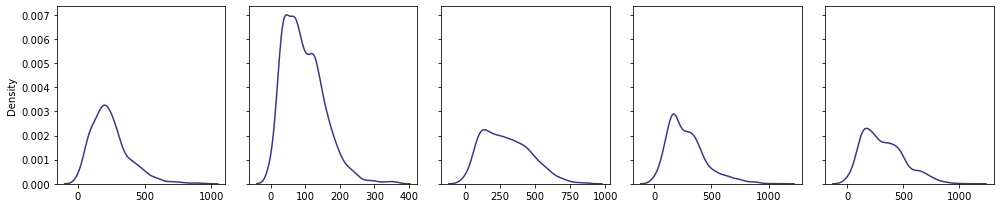

In [102]:
fig, ax = plt.subplots(1,5, figsize=(14,3), sharey=True)

for index,i in enumerate(X.T):
    sns.kdeplot(i, ax=ax[index],# hue=df['kmeansLabels_n2']
               )
    
# monomodality across all params

plt.tight_layout()

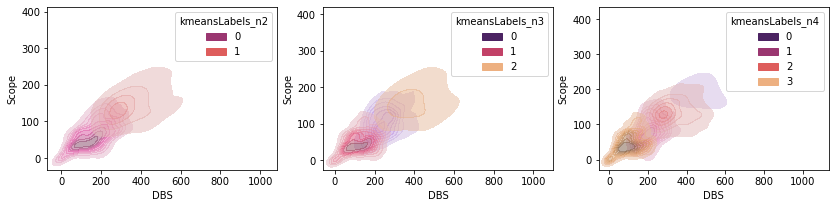

In [110]:
fig, ax = plt.subplots(1,3, figsize=(14,3))

for index, n_clusters in enumerate(range(2,5)):
    sns.kdeplot(data=df, 
                x=df.columns[3], y=df.columns[4], 
                hue='kmeansLabels_n{}'.format(n_clusters),
                ax=ax[index], 
               fill = True, 
               palette="flare_r", alpha=.5);

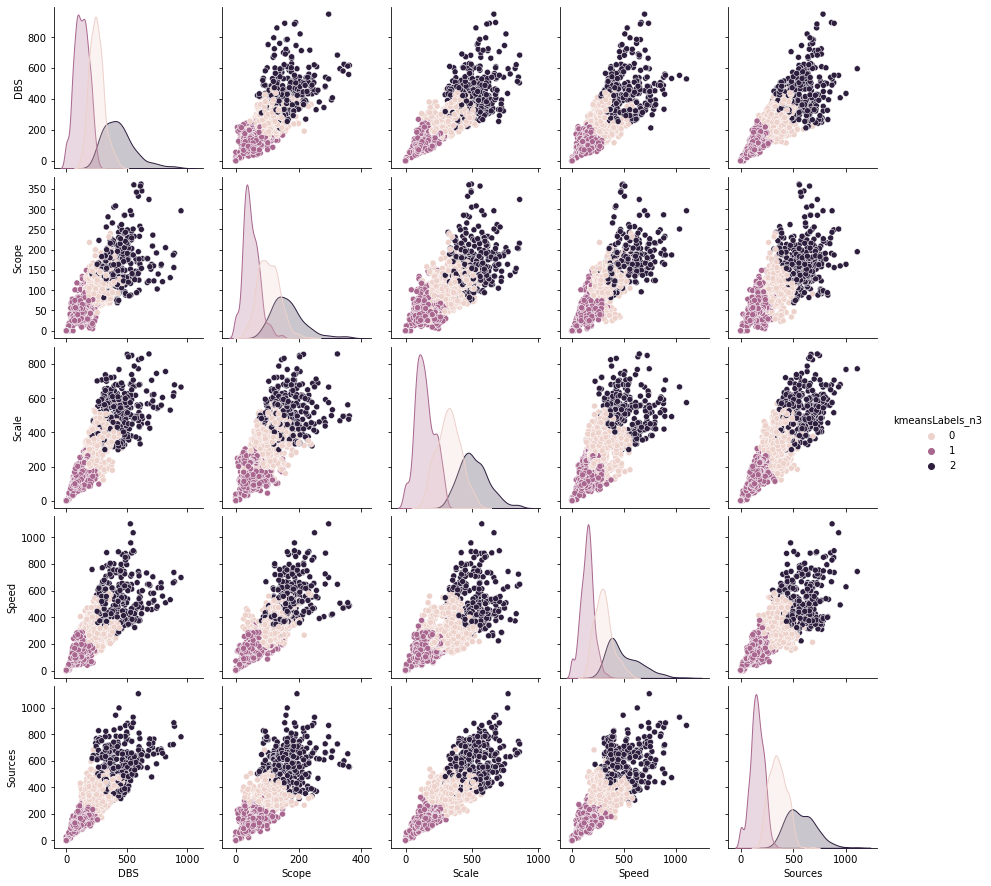

In [104]:
sns.set_palette('viridis')

sns.pairplot(data=df, 
             hue='kmeansLabels_n{}'.format(3),
             vars=df.columns[3:-3])
plt.show()

<AxesSubplot:ylabel='Density'>

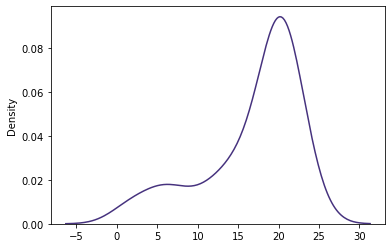

In [92]:
df = pd.read_csv('../data/results_dataframe_{}.csv'.format('2022-05-18'))#, index_col=[0,1])
df['period']=pd.to_datetime(df.period)
df.sort_values(['company', 'period'], inplace=True)

# Lets make these columns wider, i.e. flatten all data for a company

#how long are these?
lengths= []
indicies_to_drop = []
for company in df.company.unique():
    length = len(df[df.company == company])
    lengths.append(length)
    if length == 20:
        pass
    else:
        indicies_to_drop.extend(list(df[df.company == company].index))
    
    
sns.kdeplot(lengths)  # so if they are longer than 20, we want em!
#indicies_to_drop

In [93]:
df.drop(index=indicies_to_drop)

,period,company,level_1,DBS,Scope of Digital Business Strategy,Scale of Digital Business Strategy,Speed of Digital Business Strategy,Sources of Value Creation and Capture
1,2017-03-01,AEP,AEP_2017_Q1,157,52,243,177,147
53,2017-06-01,AEP,AEP_2017_Q2,178,49,280,205,181
107,2017-09-01,AEP,AEP_2017_Q3,188,44,284,219,174
163,2017-12-01,AEP,AEP_2017_Q4,181,53,279,268,189
220,2018-03-01,AEP,AEP_2018_Q1,139,37,232,190,136
...,...,...,...,...,...,...,...,...
1072,2020-12-01,vertex,vertex_2020_Q4,95,52,130,248,135
1154,2021-03-01,vertex,vertex_2021_Q1,131,45,126,283,134
1235,2021-06-01,vertex,vertex_2021_Q2,136,55,140,228,139
1320,2021-09-01,vertex,vertex_2021_Q3,132,65,171,288,150
